# Concevez une application au service de la santé publique 2: Analyse

Objectifs: 
-  Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). 
- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

Idées:

- ~~pie chart représentant les proportions typiques de fat, carbs, prots et fibers pour chaque pnns_group.~~
- ~~pie chart représentant les proportions typiques recommandées.~~
- ~~représenter les valeurs typiques de nutriscore pour chaque catégorie (+ ou - imposé)~~

- par catégorie de produit, regarder:
    - l'influence de la présence d'un macronutriment sur un autre/les autres
    - la conjonction entre nutriscore et quantités pour les différents macronutriments
- si on veut faire une sélection d'un combo One-dish meals+Milk and yogurt+Fruits, on peut repérer si il y a des combos typiques (à l'aide des catégories?)

Rappel de l'idée d'application: Réaliser une proposition de combo à partir d'un One-dish meal de manière à améliorer le ratio de macronutriments ingérés, en ajoutant un fruit et/ou un laitage au menu. 
1. L'application évalue l'écart entre les macronutriments présents et une valeur "idéale", basée sur les ANC
2. L'application, pour atteindre un meilleur ratio, propose alors de compléter le repas avec un laitage et/ou fruit
3. Ce faisant, l'application tente de maximiser les apports de fibres, et minimiser ceux de sel.
4. Enfin, pour deux produits équivalents, l'appliccation propose celui de meilleur nutriscore

# Sommaire
__[I Chargement du jeu de données](#I-Chargement-du-jeu-de-données)__  

__[II Analyse univariée](#II-Analyse-univariée)__  

[II.1 Répartition typique de l'énergie parmi les macronutriments](#II.1-Répartition-typique-de-l'énergie-parmi-les-macronutriments)\
[II.1.1 Répartition générale](#II.1.1-Répartition-générale)\
[II.1.2 Répartition par groupe d'aliment](#II.1.2-Répartition-par-groupe-d'aliment)\
[II.1.3 Représentation des proportions de chaque macronutriment dans le bilan global](#II.1.3-Représentation-des-proportions-de-chaque-macronutriment-dans-le-bilan-global)\
[II.2 Distribution des valeurs du nutriscore](#II.2-Distribution-des-valeurs-du-nutriscore)\
[II.2.1 Distribution générale](#II.2.1-Distribution-générale)\
[II.2.2 Distribution sur chacune des catégorie d'aliment](#II.2.2-Distribution-sur-chacune-des-catégorie-d'aliment)\
[II.3 Résumés](#II.3-Résumés)\
[II.3.1 Distribution des macronutriments selon les groupes d'aliment et nutriscore](#II.3.1-Distribution-des-macronutriments-selon-les-groupes-d'aliment-et-nutriscore)\
[II.3.2 Distribution des groupes d'aliment par macronutriment et nutriscore](#II.3.2-Distribution-des-groupes-d'aliment-par-macronutriment-et-nutriscore)

__[III analyse bivariée](#III-Analyse-bivariée)__\
__[IV Analyse multivariée: ACP](#IV-Analyse-multivariée:-ACP)__

# I Chargement du jeu de données

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import missingno as msno

In [284]:
df = pd.read_csv("./df_app1_clean.csv", )
df.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,...,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff,f_na
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,...,1.0,2.7,21.2,3.6,4.80,27.50,False,NaN,4.50,3
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,...,-2.0,0.0,144.0,2.4,6.84,153.24,True,False,3.76,4
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,...,1.0,114.3,15.6,7.6,5.80,137.50,False,NaN,5.50,3
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,...,17.0,135.0,4.0,96.0,0.30,235.00,False,NaN,0.00,3
5,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,2.2,15.3,0.5,...,0.0,19.8,61.2,27.2,0.95,109.15,False,NaN,0.05,4


In [285]:
df.describe()

,ecoscore_score_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,diff,f_na
count,21924.000000,32081.000000,28737.000000,28743.000000,28651.000000,13178.000000,28766.000000,27497.000000,32081.000000,32081.000000,32081.000000,32081.000000,32081.000000,32081.000000,32081.000000
mean,57.173508,132.273992,6.069671,13.585239,6.393431,1.732732,5.486393,2.753282,53.382200,55.074099,21.352683,2.951051,131.427188,0.846804,3.099155
std,28.345514,86.849686,7.034086,13.345116,10.082592,1.877657,5.320676,5.473407,63.479255,53.533745,20.940456,2.940457,86.738049,2.150154,1.151243
min,-23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.600000,0.000000
25%,39.000000,70.000000,1.600000,5.300000,1.300000,0.600000,2.400000,-1.000000,12.600000,22.200000,8.000000,0.800000,69.300000,-0.011000,3.000000
50%,58.000000,108.400000,3.950000,11.300000,3.000000,1.475000,4.200000,2.000000,33.300000,46.000000,16.000000,2.660000,107.700000,0.100000,3.000000
75%,80.000000,164.000000,8.000000,15.900000,9.400000,2.200000,7.200000,4.000000,70.200000,64.000000,28.400000,3.990000,162.000000,1.700000,4.000000
max,124.000000,900.000000,100.000000,98.400000,85.200000,45.500000,92.000000,34.000000,900.000000,393.600000,368.000000,86.450000,900.000000,8.100003,4.000000


On ne garde que les produits possédant le tag "en:yogurts" pour éviter d'avoir des produits laitiers no pertinents pour notre problème (crèmes fraîches etc.)

In [286]:
df.index = pd.Index(range(0, df.shape[0]))
X = df.copy()

# On commence par retirer les colonnes que nous n'allons pas utiliser
X.drop(columns=["fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "diff", "f_na", "e_nn", "out_e"], inplace=True)

# On ne récupère que les produits dont les categories_tags pour le groupe Milk and yogurt contiennent en:yogurt
# Sinon, on récupère aussi les crème fraîche, crème fouettées etc. qui faussent les valeurs nutritionnelles et
# ne sont pas considérées comme des produits intéressants du point du vue de notre application
may = X.groupby(["pnns_groups_2"]).get_group(("Milk and yogurt"))
yogurts_desserts = may.loc[may.apply(lambda x: (x["categories_tags"].count("en:yogurts")==0 | x["categories_tags"].count("en:desserts")==0), axis=1)]
drop_index = yogurts.index

# On retire les lignes correspondantes du dataframe
#X.drop(index=drop_index, inplace=True)
X.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.80,27.50
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.80,137.50
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.30,235.00
4,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15


In [287]:
X.describe()

,ecoscore_score_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
count,21924.000000,32081.000000,27497.000000,32081.000000,32081.000000,32081.000000,32081.000000,32081.000000
mean,57.173508,132.273992,2.753282,53.382200,55.074099,21.352683,2.951051,131.427188
std,28.345514,86.849686,5.473407,63.479255,53.533745,20.940456,2.940457,86.738049
min,-23.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,70.000000,-1.000000,12.600000,22.200000,8.000000,0.800000,69.300000
50%,58.000000,108.400000,2.000000,33.300000,46.000000,16.000000,2.660000,107.700000
75%,80.000000,164.000000,4.000000,70.200000,64.000000,28.400000,3.990000,162.000000
max,124.000000,900.000000,34.000000,900.000000,393.600000,368.000000,86.450000,900.000000


# II Analyse exploratoire

## II.1 Répartitions typiques de l'énergie et des macronutriments

### II.1.1 Répartition générale

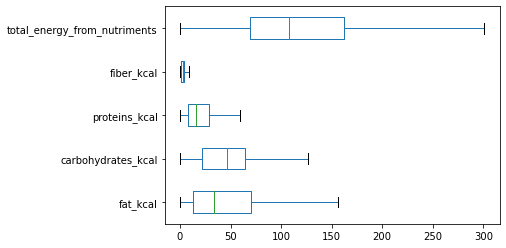

----------------------------------------
Moyennes en kcal des différentes valeurs nutritionnelles sur le dataset global:
fat_kcal                         53.382200
carbohydrates_kcal               55.074099
proteins_kcal                    21.352683
fiber_kcal                        2.951051
total_energy_from_nutriments    131.427188
dtype: float64
----------------------------------------
Médianes en kcal des différentes valeurs nutritionnelles sur le dataset global:
fat_kcal                         33.30
carbohydrates_kcal               46.00
proteins_kcal                    16.00
fiber_kcal                        2.66
total_energy_from_nutriments    107.70
dtype: float64


In [288]:
X[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutriments"]].plot(kind="box", vert=False, showfliers=False)
plt.show()
print("-"*40)
print("Moyennes en kcal des différentes valeurs nutritionnelles sur le dataset global:")
print(X[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutriments"]].mean())
print("-"*40)
print("Médianes en kcal des différentes valeurs nutritionnelles sur le dataset global:")
print(X[["fat_kcal",
   "carbohydrates_kcal",
   "proteins_kcal",
   "fiber_kcal",
   "total_energy_from_nutriments"]].median())

Comme attendu, l'énergie total possède les variations les plus étendues. Parmi les macronutriments, les lipides (fat_kcal) et les glucides (carbohydrates_kcal) contribuent pour la majeure partie de la valeur énergétique globale, puis viennent les protéines (proteins_kcal) et enfin les fibres (fiber_kcal) dont la contribution est marginale.

### II.1.2 Les catégories One-dish meals, Fruits et Milk and yogurt

Combien de représentants de chaque catégorie?

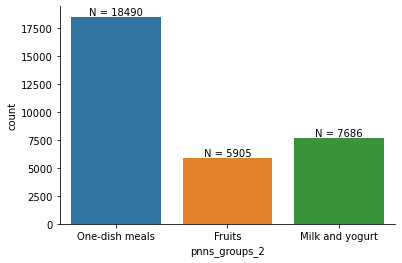

In [289]:
fig, ax = plt.subplots()
sns.countplot(x="pnns_groups_2",
              data=X,
              ax=ax)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("N = {:.0f}".format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
sns.despine(ax=ax)
plt.show()

Les One-dish meals sont largement surreprésentés par rapport aux deux autres catégories. Il faudra savoir en tenir compte. En attendant, regardons comment leur composition diffère.

### II.1.3 Représentation des proportions de chaque macronutriment dans le bilan global

On commence par créer un dataframe regroupant les valeurs moyennes des macronutriments pour chaque groupe d'aliment

In [290]:
# On groupe les valeurs par catégorie d'aliment.
gr = X.groupby("pnns_groups_2")[["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]].mean()
gr.head()

,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal
pnns_groups_2,,,,
Fruits,9.055107,85.569913,3.646912,4.429740
Milk and yogurt,50.210831,38.810883,16.370674,0.544749
One-dish meals,68.856868,52.095261,29.078173,3.479076


A titre de comparaison, on récupère aussi les valeurs moyennes sur l'ensemble du dataset.

In [291]:
# Valeurs globales
gen = X[["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]].mean()
gen

fat_kcal              53.382200
carbohydrates_kcal    55.074099
proteins_kcal         21.352683
fiber_kcal             2.951051
dtype: float64

On représente ces valeurs moyennes sous forme de proportion au bilan global pour chaque groupe d'aliment

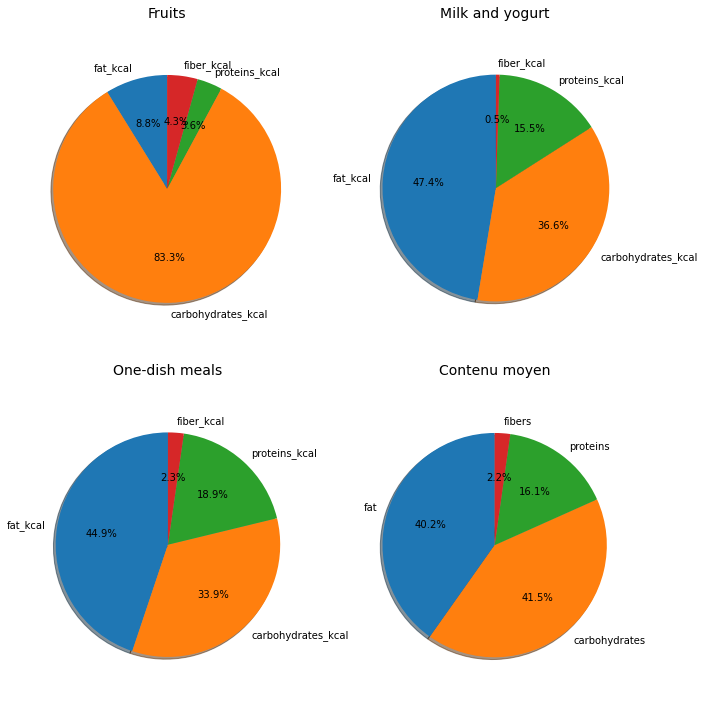

In [294]:
# Représentation sous forme de pie chart
labels = ["fat", "carbohydrates","proteins", "fibers"]

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax1.pie(gr.loc["Fruits"], labels = gr.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Fruits", pad=20, fontsize=14)

ax2.pie(gr.loc["Milk and yogurt"], labels = gr.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Milk and yogurt", pad=20, fontsize=14)

ax3.pie(gr.loc["One-dish meals"], labels = gr.columns, autopct='%1.1f%%',
shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("One-dish meals", pad=20, fontsize=14)

ax4.pie(gen, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Contenu moyen", pad=20, fontsize=14)


plt.tight_layout(pad=1.5)
plt.show()

A titre de comparaison, voici la répartition obtenue si on respecte les ANC:

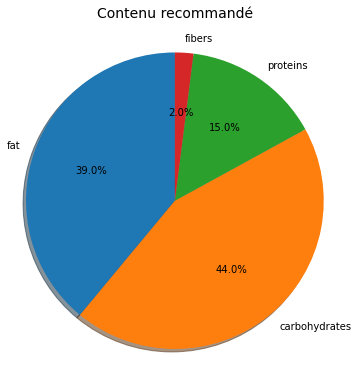

In [295]:
anc = [39, 44, 15, 2]
labels = ["fat", "carbohydrates","proteins", "fibers"]

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(anc, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Contenu recommandé", pad=20, fontsize=14)
plt.show()

Le contenu moyen est très proche des valeurs recommandées! D'où le conseil de manger équilibré, avec un repas composé d'un plat accompagné d'un laitage et d'un ou plusieurs fruits.

### II.1.4 Association d'un macronutriment dominant avec un groupe de produits

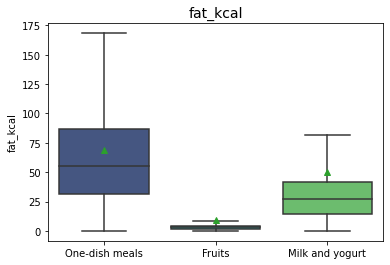

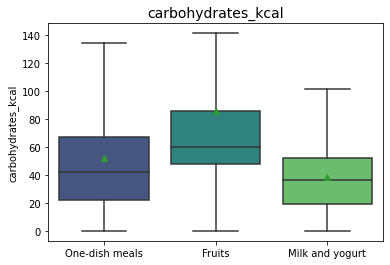

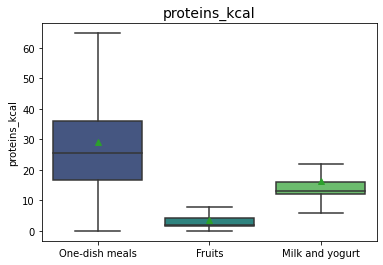

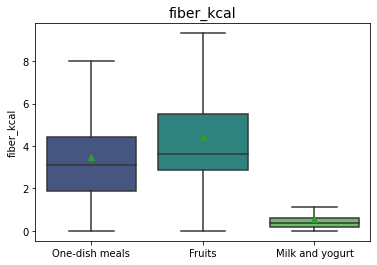

In [296]:
nutricols = ["fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]
for c in nutricols:
    fig, ax1 = plt.subplots()
    sns.boxplot(y=c,
                x="pnns_groups_2",
                data=X,
                showfliers=False,
                showmeans=True,
                palette="viridis",
                ax=ax1)
    ax1.set_xlabel("")
    ax1.set_title(c, fontsize=14)
    plt.tight_layout
    plt.show()

On voit que chaque macronutriment est présent dans chaque catégorie d'aliment, mais en proportion différentes. Essayons de confirmer cette observation de façon plus rigoureuse. Commençons avec le contenu en lipides.

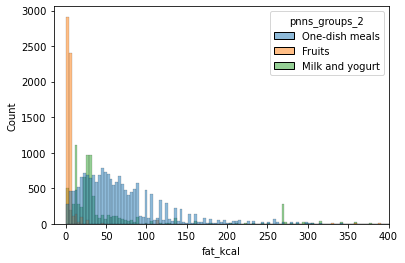

In [297]:
sns.histplot(x="fat_kcal",
             data=X,
             hue="pnns_groups_2"
            )
plt.xlim([-15, 400])
plt.show()

En ce qui concerne les fruits c'est assez clair visuellement. Mais qu'en est-il des Milk and yogurt et des One-dish meals? Il y a environ 2.5 fois plus de One dish meals que de Milk and yogurt, peut-être cela fausse-t-il les résultats? 

In [298]:
from scipy import stats

def anova_oneway(df, var_cat, measure, levels=None, sample_size=500):
    
    global_data = df.copy()
    if levels is None:
        levels = global_data[var_cat].unique()
    
    
    data_samples = dict()
    length_samples = dict()
    
    
    fig, ax = plt.subplots()
    colors = ["cornflowerblue", "orange"]
    # Constitution des échantillons associés à chacun de ces groupes
    for i,l in enumerate(levels):
        dfi = df.groupby(var_cat).get_group(l)[measure].sample(sample_size)
        data_samples[i] = dfi
        length_samples[i] = dfi.shape[0]
        sns.histplot(data=dfi, color = colors[i], label=l)
        plt.title("Distributions pour les groupes {}\nSous-échantillon de {} individus par groupe".format(levels, sample_size))
        plt.legend()
        #dfi.plot(kind="hist", bins=20)
        
        #try:
        #    print(l+": ", dfi.mean())
        #except:
        #    print(str(l)+": ", dfi.mean())
   # sns.histplot(data=pd.concat([]))
    total = pd.concat([data_samples[i] for i in range(len(levels))])
    
    #global_data = y.sample(1000)["carbohydrates_ratio"]
    #odm = y.groupby("pnns_groups_2").get_group("One-dish meals")["fat_kcal"]
    #may = y.groupby("pnns_groups_2").get_group("Milk and yogurt")["fat_kcal"]
    #fru = y.groupby("pnns_groups_2").get_group("Fruits").sample(1000)["carbohydrates_ratio"]
    
    #N_odm = odm.shape[0]
    #N_may = may.shape[0]
    #N_fru = fru.shape[0]
    
    # nombre d'échantillons
    k = len(levels)
    
    # Nombre total d'individus
    N = total.shape[0]
    
    # Degrés de liberté "between", "within" et "total"
    DFbetween = k - 1
    DFwithin = N - k
    DFtotal = N - 1
    
    # SStotal
    SStotal = (total**2).sum() - (total.sum())**2/N
    #SStotal = (pd.concat([may, fru])**2).sum() - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)
    
    # SSwitihin
    ss_samples = dict()
    for i, l in enumerate(levels):
        ss_samples[i] = (data_samples[i]**2).sum() - (data_samples[i].sum())**2/length_samples[i]
    
    #ss_odm = (odm**2).sum() - (odm.sum())**2/N_odm
    #ss_may = (may**2).sum() - (may.sum())**2/N_may
    #ss_fru = (fru**2).sum() - (fru.sum())**2/N_fru
    
    SSwithin = sum([ss_samples[i] for i in range(len(levels))])
    #SSwithin = ss_odm + ss_may + ss_fru
    
    # SSbetween
    SSbetween = sum([(data_samples[i].sum())**2/length_samples[i] for i in range(len(levels))]) - ((total.sum())**2/N)
    #SSbetween1 = (odm.sum())**2/N_odm + (may.sum())**2/N_may + (fru.sum())**2/N_fru - (y["score"].sum())**2/N
    #SSbetween1 = (fru.sum())**2/N_fru + (may.sum())**2/N_may - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)
    
    SSbetween2 = SStotal - SSwithin
    #print("Comparaison des SSbetween: ", SSbetween, SSbetween2)
    
    # MSbetween
    MSbetween = SSbetween/DFbetween
#    MSbetween = SSbetween1/DFbetween
    
    # MSwithin
    MSwithin = SSwithin/DFwithin
    #MSwithin = SSwithin/DFwithin
    
    #F
    F = MSbetween/MSwithin
    
    # p-valeur
    p = stats.f.sf(F, DFbetween, DFwithin)
    
    # eta squared
    eta_sq = SSbetween/SStotal
    
    # Verification de l'hypothèse de variance égale entre les groupes
    print("Variances: ", [ss_samples[i] for i in range(len(levels))])
    #print("Variances: ", ss_odm, ss_may, ss_fru)
    print("SSbetween, SSwithin: {:.0f}, {:.0f}".format(SSbetween, SSwithin))
    print("MSBetween, MSwithin {:.0f}, {:.0f}".format(MSbetween, MSwithin))
    print("F, p : {:.1f}, {:.2f}".format(F, p))
    print("eta squared: {:.3f}".format(eta_sq))

Variances:  [3222202.721211223, 5513869.80687279]
SSbetween, SSwithin: 132472, 8736073
MSBetween, MSwithin 132472, 4372
F, p : 30.3, 0.00
eta squared: 0.015


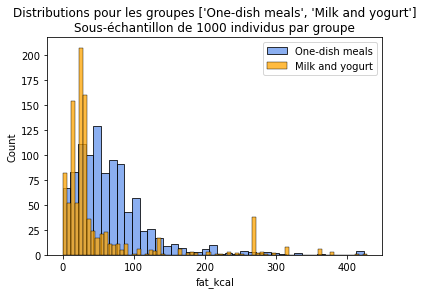

In [299]:
anova_oneway(X, "pnns_groups_2", "fat_kcal", levels=["One-dish meals", "Milk and yogurt"], sample_size=1000)

L'effet est très significatif (très petit p) mais faible (eta squared << 1)

Variances:  [2008456.8477218025, 976251.9257372185]
SSbetween, SSwithin: 55712, 2984709
MSBetween, MSwithin 55712, 1494
F, p : 37.3, 0.00
eta squared: 0.018


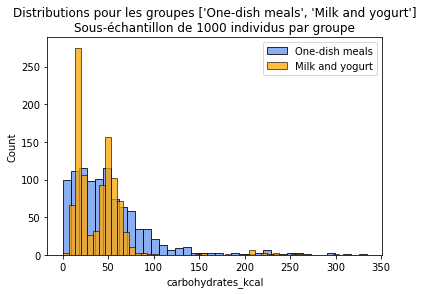

In [323]:
anova_oneway(X, "pnns_groups_2", "carbohydrates_kcal", levels=["One-dish meals", "Milk and yogurt"], sample_size=1000)

Variances:  [7842.560511071, 10338.060980551]
SSbetween, SSwithin: 408, 18181
MSBetween, MSwithin 408, 9
F, p : 44.9, 0.00
eta squared: 0.022


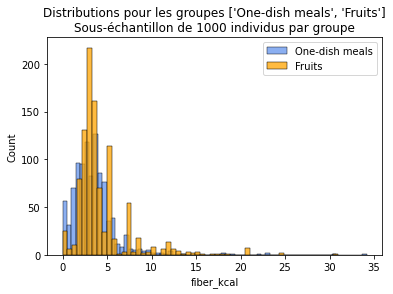

In [301]:
anova_oneway(X, "pnns_groups_2", "fiber_kcal", levels=["One-dish meals", "Fruits"], sample_size=1000)

## II.2 Distribution des valeurs du nutriscore

### II.2.1 Distribution générale

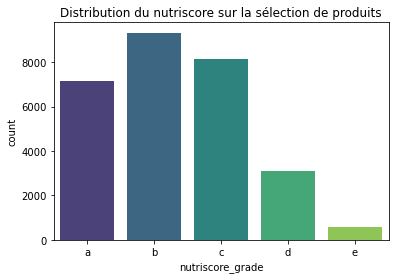

In [245]:
sns.countplot(x="nutriscore_grade",
            data=X.sort_values(by="nutriscore_grade"),
             palette="viridis")
plt.title("Distribution du nutriscore sur la sélection de produits")
plt.show()

### II.2.2 Distribution sur chacune des catégorie d'aliment

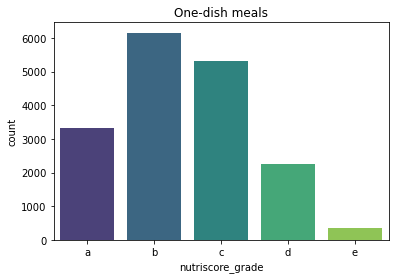

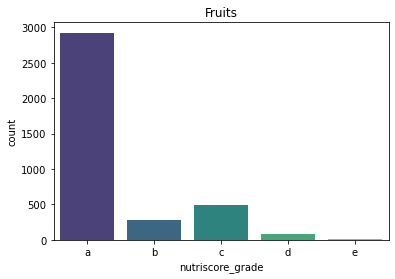

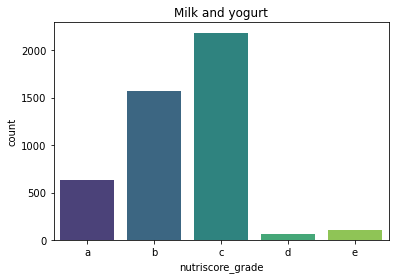

In [230]:
for pg in X.pnns_groups_2.unique():
    sns.countplot(x="nutriscore_grade",
                  data=X.loc[X.pnns_groups_2==pg].dropna(subset=["nutriscore_grade"]).sort_values(by=["nutriscore_grade"]),
                  palette="viridis"
                 )
    plt.title(pg)
    plt.show()

La distribution pour les One-dish meals suit de près la distribution globale. On peut supposer que la distribution globale est principalement influencée par la distribution des One-dish meals.

## II.3 Analyse croisée des différents indicateurs

### II.3.1 Score 

Pour pouvoir réaliser notre idée d'application, il est nécessaire d'avoir un indicateur qui renseigne sur l'écart d'un produit aux valeurs idéales, en terme de fraction du contenu global.

In [302]:
# On ne garde que les lignes pour lesquelles aucune des variables ne vaut 0
zeros = X[["fat_kcal", "carbohydrates_kcal", "proteins_kcal"]].sum(axis=1)==0
drop_index = zeros[zeros].index

X.drop(index=drop_index, inplace=True)

In [303]:
# On crée les nouvelles colonnes "fat_ratio", "carbohydrates_ratio" et "proteins_ratio" qui renseigneront sur 
# les ratio de macronutriments dans les contenus globaux.
X.loc[:, "fat_ratio"] = X.apply(lambda x: x["fat_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]+x["fiber_kcal"]), axis=1)
X.loc[:, "carbohydrates_ratio"] = X.apply(lambda x: x["carbohydrates_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]+x["fiber_kcal"]), axis=1)
X.loc[:, "proteins_ratio"] = X.apply(lambda x: x["proteins_kcal"]/(x["fat_kcal"]+x["carbohydrates_kcal"]+x["proteins_kcal"]+x["fiber_kcal"]), axis=1)

In [304]:
# Définition et calcul du score pour chaque produit
def score(fat, carbs, proteins, method="abs"):
    if method=="abs":
        return np.abs(fat-0.35) + np.abs(carbs-0.4) + np.abs(proteins-0.15)
    elif method=="sq":
        return np.sqrt((fat-0.35**2) + (carbs-0.4)**2 + (proteins-0.15)**2)

sc = score(X["fat_ratio"], X["carbohydrates_ratio"], X["proteins_ratio"], method="abs")

In [305]:
# Nouvelle colonne "score" dans le dataframe
X.loc[:, "score"] = sc
X.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,fat_ratio,carbohydrates_ratio,proteins_ratio,score
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.80,27.50,0.083591,0.656347,0.111455,0.561300
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24,0.000000,0.939702,0.015662,1.024041
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.80,137.50,0.797627,0.108863,0.053036,0.835729
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.30,235.00,0.573736,0.017000,0.407990,0.864726
4,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15,0.181402,0.560696,0.249198,0.428493


<AxesSubplot:xlabel='score', ylabel='Count'>

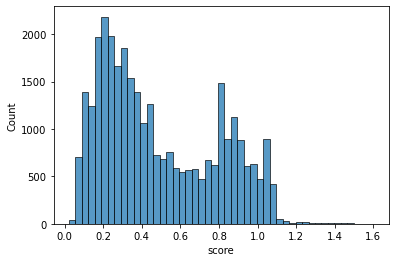

In [306]:
sns.histplot(x="score",
            data=X
           )

Le score va nous permettre de comparer les compositions globales des produits, et non chacune des valeurs des macronutriments séparément. Un bon score est un score bas, et signale un produit dont les valeurs pour \[fat_ratio, carbohydrates_ratio et proteins_ratio\] se rapprochent des ANC. Par ailleurs un bon nutriscore signale un produit dont le contenu est "meilleur" pour la santé qu'un produit de même catégorie et de nutriscore moins bon. On peut se demander si il y a une corrélation entre le score et le nutriscore?  

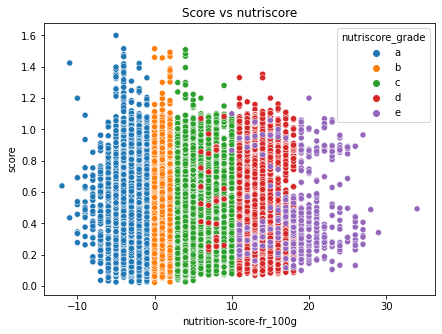

In [307]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="nutrition-score-fr_100g",
                y="score",
                data=X.sort_values(by="nutriscore_grade"),
                hue="nutriscore_grade"
               )
plt.title("Score vs nutriscore")
plt.show()

"Tranches de score" pour réaliser une analyse chi-2

In [308]:
taille_classe = 0.4 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(X["score"]), taille_classe)
#tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(X["score"], tranches) # associe chaque solde à son numéro de classe

In [309]:
X.loc[:, "score_group"] = indices
X.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,fat_ratio,carbohydrates_ratio,proteins_ratio,score,score_group
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.80,27.50,0.083591,0.656347,0.111455,0.561300,2
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24,0.000000,0.939702,0.015662,1.024041,3
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.80,137.50,0.797627,0.108863,0.053036,0.835729,3
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.30,235.00,0.573736,0.017000,0.407990,0.864726,3
4,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15,0.181402,0.560696,0.249198,0.428493,2


In [311]:
x = "score_group"
y = "nutriscore_grade"

cont = X[[x,y]].pivot_table(index=x,columns=y,aggfunc=len,margins=True,margins_name="Total")
cont

nutriscore_grade,a,b,c,d,e,Total
score_group,,,,,,
1,2293.0,6000.0,4958.0,1089.0,257.0,14597
2,1948.0,2431.0,2053.0,677.0,138.0,7247
3,2759.0,654.0,861.0,1163.0,131.0,5568
4,40.0,12.0,12.0,3.0,NaN,67
Total,7040.0,9097.0,7884.0,2932.0,526.0,27479


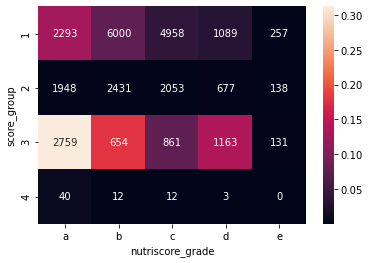

In [313]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(z)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], fmt=".0f")
plt.show()

Les valeurs nous indiquent que les scores ne sont pas ou très peu corrélés avec le nutriscore.

Certains produits ont un nutrition-score-fr_100g et un nutriscore_grade qui ne correspondent pas.

<AxesSubplot:xlabel='count', ylabel='nutrition-score-fr_100g'>

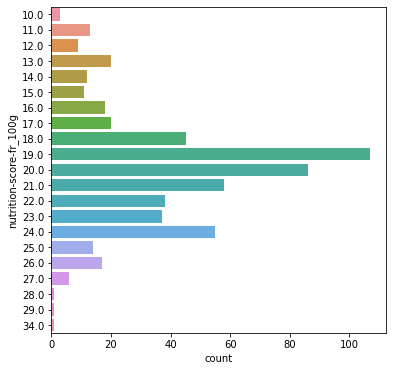

In [22]:
plt.figure(figsize=(6, 6))
sns.countplot(y="nutrition-score-fr_100g",
              data=X.loc[X["nutriscore_grade"]=="e"]
             )
plt.show()

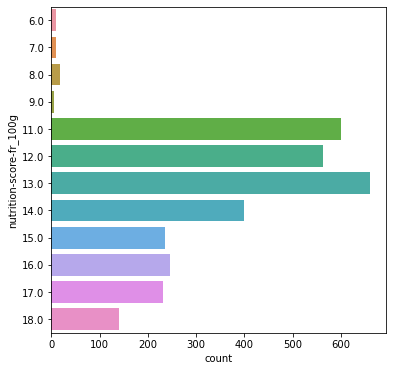

In [23]:
plt.figure(figsize=(6, 6))
sns.countplot(y="nutrition-score-fr_100g",
              data=X.loc[X["nutriscore_grade"]=="d"]
             )
plt.show()

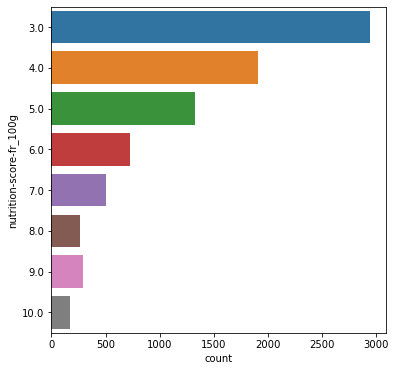

In [24]:
plt.figure(figsize=(6, 6))
sns.countplot(y="nutrition-score-fr_100g",
              data=X.loc[X["nutriscore_grade"]=="c"]
             )
plt.show()

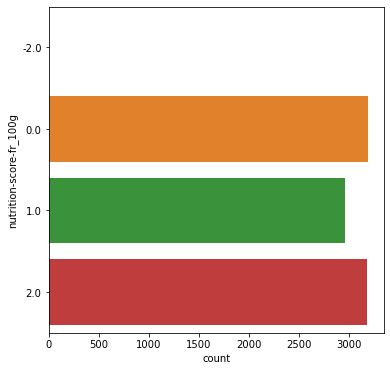

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(y="nutrition-score-fr_100g",
              data=X.loc[X["nutriscore_grade"]=="b"]
             )
plt.show()

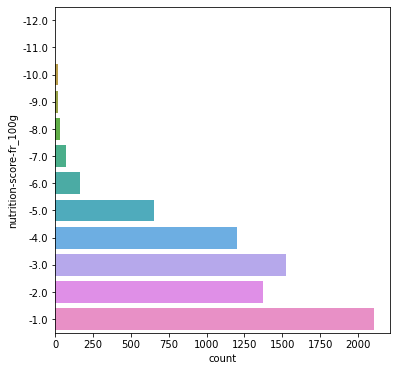

In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(y="nutrition-score-fr_100g",
              data=X.loc[X["nutriscore_grade"]=="a"]
             )
plt.show()

# IV Analyse multivariée: ACP

**Question: peut-on synthétiser nos variables nutritionnelles? Sont-elles corrélées entre elles?**

ACP:
- La variabilité entre les individus, c'est-à-dire quelles sont les différences et les ressemblances entre individus (un individu= un produit ici)

- Les liaisons entre les variables : y a-t-il des groupes de variables très corrélées entre elles qui peuvent être regroupées en de nouvelles variables synthétiques ?

**On analyse les relations entre les variables \["energy-kcal_100g", "nutrition-score-fr_100g","fat_ratio","carbohydrates_ratio","proteins_ratio", "score", "fiber_kcal"\]**

In [163]:
# critère pour le nombre de composantes
print("On ne garde que les axes portant au moins {:.2f}% d'inertie.".format(100/7)) 

On ne garde que les axes portant au moins 14.29% d'inertie.


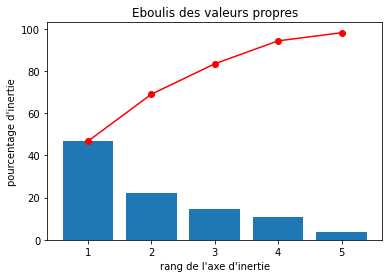

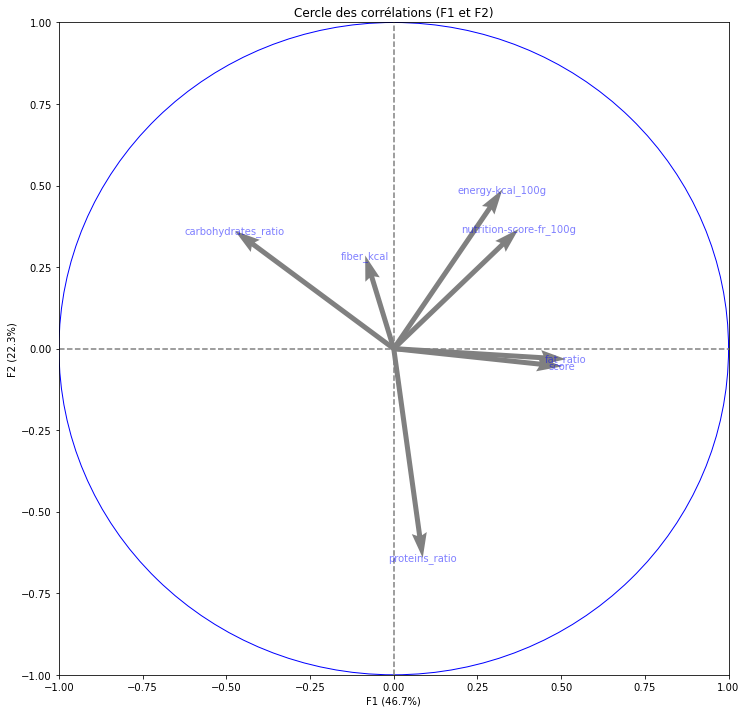

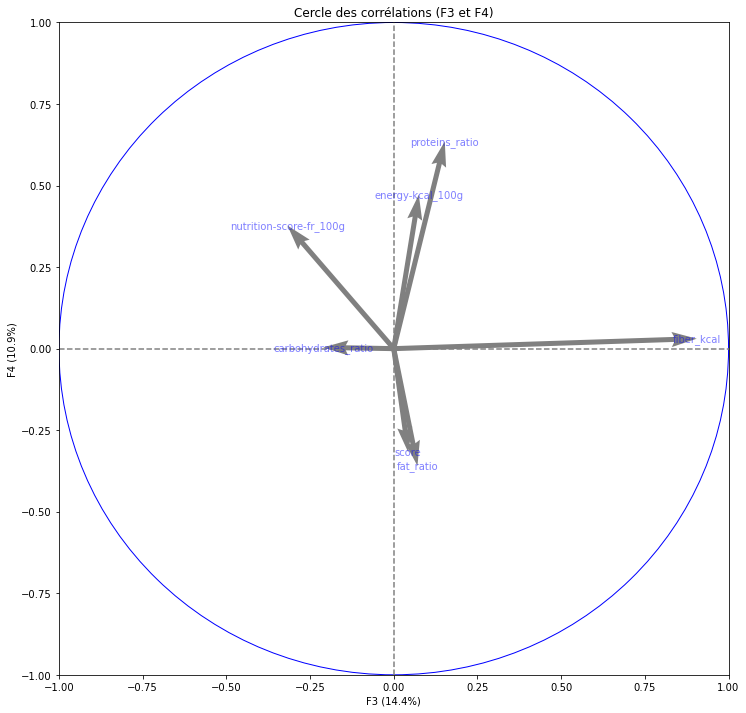

In [146]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# On ne récupère que les lignes pour lesquelles nutrition-score-fr_100g est renseignée.
y = X.loc[X["nutrition-score-fr_100g"].notna()]
y.index = pd.Index(range(0, y.shape[0]))

# On ne garde que les colonnes à prendre en compte dans l'ACP (c'est-à-dire les colonnes de valeurs numériques)
df_acp = y[["energy-kcal_100g", "nutrition-score-fr_100g",
            "fat_ratio","carbohydrates_ratio","proteins_ratio", "score", "fiber_kcal"]].dropna(subset=["score"])

features = df_acp.columns
index = y.index

# choix du nombre de composantes à calculer
n_comp = 5

# Centrage et RéductionS
std_scale = preprocessing.StandardScaler().fit(df_acp)
X_scaled = std_scale.transform(df_acp)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

In [147]:
def print_acp_analysis(df=df_acp, pca=pca):
    print("\nF1 donné par :\n")
    for v,c in sorted(list(zip(df.columns.to_numpy(), pca.components_[0])), key=lambda x: x[1], reverse=True):
        print("{} {:.2f}".format(v,c))
    print("\nF2 donné par:\n")
    for v,c in sorted(list(zip(df.columns.to_numpy(), pca.components_[1])), key=lambda x: x[1], reverse=True):
        print("{} {:.2f}".format(v,c))
    print("\nF3 donné par:\n")
    for v,c in sorted(list(zip(df.columns.to_numpy(), pca.components_[2])), key=lambda x: x[1], reverse=True):
        print("{} {:.2f}".format(v,c))

In [148]:
print_acp_analysis()


F1 donné par :

fat_ratio 0.51
score 0.50
nutrition-score-fr_100g 0.37
energy-kcal_100g 0.32
proteins_ratio 0.09
fiber_kcal -0.09
carbohydrates_ratio -0.47

F2 donné par:

energy-kcal_100g 0.49
nutrition-score-fr_100g 0.37
carbohydrates_ratio 0.36
fiber_kcal 0.29
fat_ratio -0.03
score -0.05
proteins_ratio -0.64

F3 donné par:

fiber_kcal 0.91
proteins_ratio 0.15
energy-kcal_100g 0.07
fat_ratio 0.07
score 0.04
carbohydrates_ratio -0.21
nutrition-score-fr_100g -0.32


Le premier axe d'inertie est principalement corrélé à "fat_ratio", "score", et dans une moindre mesure "nutrition-score-fr_100g" puis "energy-kcal_100g". Il est anticorrélé à "carbohydrates_ratio".

Le deuxième axe est principalement corrélé à "energy-kcal_100g", et dans une moindre mesure "nutrition-score-fr_100g" et "carbohydrates_ratio". Il est anticorrélé à "proteins_ratio".

Le troisième axe est principalement corrélé à "fiber_kcal", et anticorrélé, mais dans une moindre mesure à "nutrition-score-fr_100g"

On a donc trois groupes de variables:
- les variables \[fat, score, nutrition-score-fr_100g, energy-kcal_100g\]. A noter que plus le nutrition-score est élevé, moins il est "bon". Ainsi, les produits de haut F1 sont des produits gras, de "mauvais" score c'est-à-dire s'éloignant des recommandations, énergétiques et de "mauvais" nutriscore. Clairement, le premier axe est celui en rapport avec la (haute) valeur énergétique associée aux lipides.
- les variables \[energy, nutrition-score, carbohydrates, proteins\] d'autre part. Ce deuxième regroupement renseigne sur les produits de haute valeur énergétique associée aux glucides et pauvres en protéines.
- la variable "fiber_kcal" est "seule" dans son groupe, avec une légère association négative avec le nutrition-score-fr_100g. Le troisième axe nous renseigne donc sur les produits à haute teneur en fibres, toutes choses égales par ailleurs. Il nous indique également que plus un produit contient des fibres, plus son nutrition-score-fr_100g a des chances d'être bas.

Calculons les coefficients de corrélation des différentes variables pour confirmer/infirmer les résultats de l'ACP

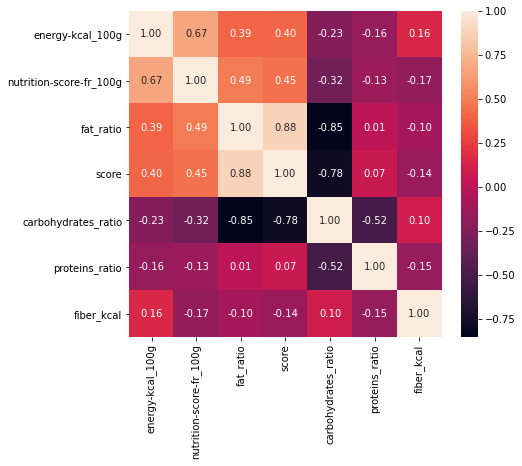

In [191]:
plt.figure(figsize=(7, 6))
corr = y[["energy-kcal_100g",
          "nutrition-score-fr_100g",
          "fat_ratio",
          "score",
          "carbohydrates_ratio",
          "proteins_ratio", 
          "fiber_kcal"]].dropna(subset=["score"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Quelques enseignements qu'on peut tirer de la matrice des corrélations:
- les blocs ("energy-kcal_100g", "nutrition-score-fr_100g") d'une part, et ("fat_ratio", "score") d'autre part, constituent des blocs de variables très corrélées les unes aux autres. Ces deux blocs possèdent par ailleurs des corrélations non négligeables entre eux. Donc en général, un produit qui possède une haute valeur énergétique possède aussi un haut nutrition-score-fr_100g, et un produit de haut fat_ratio possède un haut score. Par ailleurs, il existe en tendance associant un haut "score" et une haute valeur énergétique, avec tout ce que ça implique concernant les autres variables mentionnées ici.  
- la variable "carbohydrates_ratio" est très anticorrélée au bloc ("fat_ratio", "score"): un produit possède soit un fat_ratio élevé, soit un carbohydrates_ratio élevé, et son score est moins élevé (meilleur) dans ce dernier cas.
- les autres variables ne sont pas ou peu corrélées avec les blocs mentionnés ci-dessus.

**Affichons maintenant les projections des individus (produits) dans les deux premiers plans factoriel**

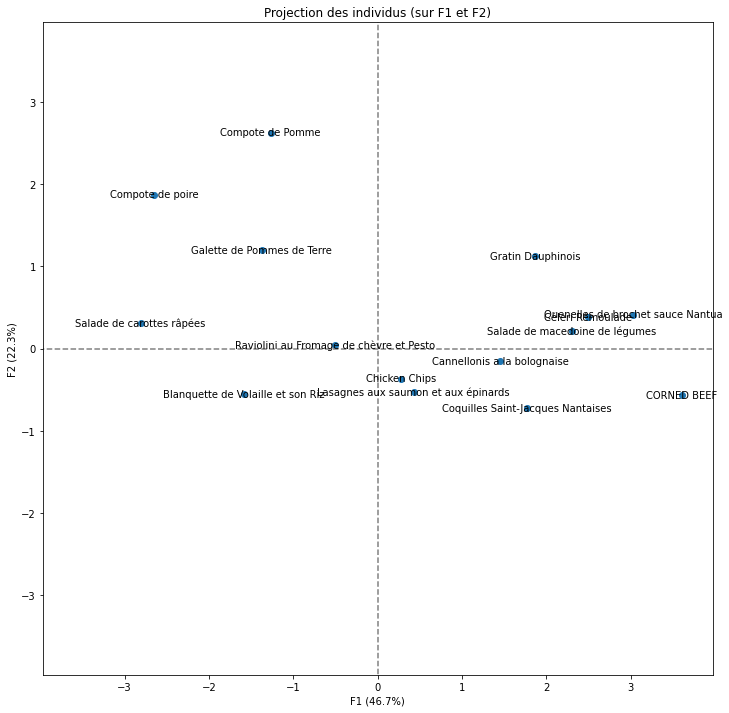

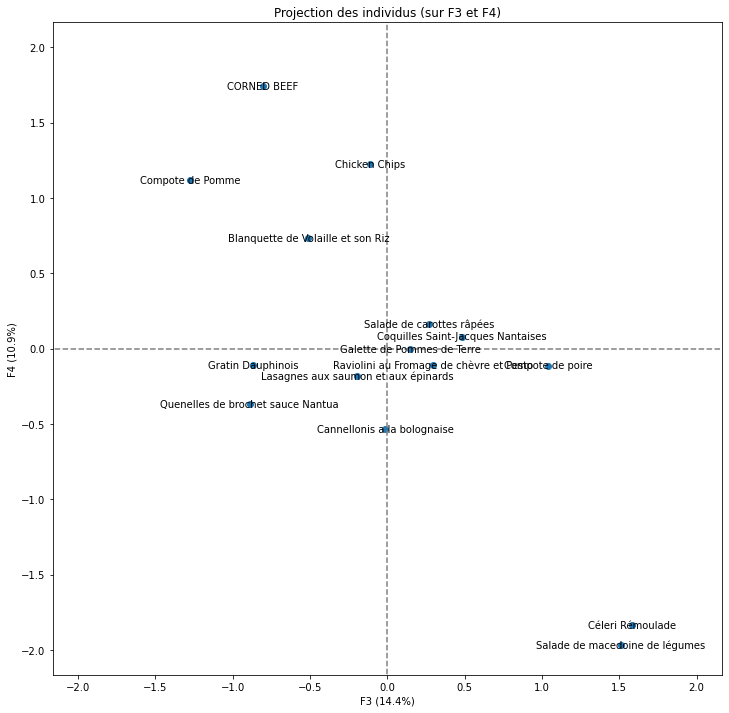

In [149]:
# Projections des individus
id = index[:15]
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected[id], n_comp, pca, [(0,1),(2,3)], labels=y.iloc[id]["product_name"].to_numpy())

In [214]:
y.iloc[id]["product_name"]

0                   Salade de carottes râpées
1                            Compote de poire
2              Salade de macedoine de légumes
3                                 CORNED BEEF
4           Blanquette de Volaille et son Riz
5     Raviolini au Fromage de chèvre et Pesto
6                            Compote de Pomme
7                            Céleri Rémoulade
8                  Galette de Pommes de Terre
9                               Chicken Chips
10        Lasagnes aux saumon et aux épinards
11                          Gratin Dauphinois
12          Coquilles Saint-Jacques Nantaises
13                Cannellonis a la bolognaise
14          Quenelles de brochet sauce Nantua
Name: product_name, dtype: object

In [150]:
def print_product_analysis(df, X_proj, id1, id2, axe=1):
    
    prod1 = dict()
    prod2 = dict()
    
    # Récupération du nom des produits à partir des index
    prod1["name"] = df.iloc[id1]["product_name"]
    prod2["name"] = df.iloc[id2]["product_name"]
    
    # analyse selon l'axe choisi
    if axe==1:
        print("Pour deux produits de F1 différents:\n")
    elif axe==2:
        print("Pour deux produits de F2 différents:\n")
    elif axe==3:
        print("Pour deux produits de F3 différents:\n")
    
    # Variables conservées pour l'analyse
    var = ["energy-kcal_100g",
           "fat_ratio", 
           "carbohydrates_ratio",
           "proteins_ratio",
           "fiber_kcal",
           "score",
           "nutrition-score-fr_100g"]
    
    
    # Valeur basse vs. valeur élevée pour l'axe
    prod1["val"] = X_proj[id1, axe-1]
    prod2["val"] = X_proj[id2, axe-1]
    text1 = "Valeur basse"
    text2 = "Valeur élevée"
    
    if prod1["val"] < prod2["val"]:
        prod1["text"] = text1
        prod2["text"] = text2
    else:
        prod1["text"] = text2
        prod2["text"] = text1
    
    # Affichage de l'analyse
    print(f"Premier produit: {prod1['name']} ({prod1['text']}):")
    print(df.iloc[id1][var])
    print("-"*40)
    print(f"Deuxième produit: {prod2['name']} ({prod2['text']}):")
    print(df.iloc[id2][var])

In [242]:
print_product_analysis(y, X_projected, 0, 7, axe=1)

Pour deux produits de F1 différents:

Premier produit: Salade de carottes râpées (Valeur basse):
energy-kcal_100g                 32
fat_ratio                  0.084375
carbohydrates_ratio          0.6625
proteins_ratio               0.1125
fiber_kcal                      4.5
score                      0.179409
nutrition-score-fr_100g           1
Name: 0, dtype: object
----------------------------------------
Deuxième produit: Céleri Rémoulade (Valeur élevée):
energy-kcal_100g                 145
fat_ratio                   0.806897
carbohydrates_ratio        0.0965517
proteins_ratio             0.0551724
fiber_kcal                         6
score                       0.886267
nutrition-score-fr_100g            3
Name: 7, dtype: object


**On retrouve donc le fait que le produit de F1 plus élevé (à F2 identique) est plus énergétique et gras et contient moins de glucides**

In [243]:
print_product_analysis(y, X_projected, 4, 6, axe=2)

Pour deux produits de F2 différents:

Premier produit: Blanquette de Volaille et son Riz (Valeur basse):
energy-kcal_100g              109.2
fat_ratio                  0.181402
carbohydrates_ratio        0.560696
proteins_ratio             0.249198
fiber_kcal                     0.95
score                      0.307515
nutrition-score-fr_100g           0
Name: 4, dtype: object
----------------------------------------
Deuxième produit: Compote de Pomme (Valeur élevée):
energy-kcal_100g                 377
fat_ratio                  0.0117647
carbohydrates_ratio         0.972549
proteins_ratio             0.0156863
fiber_kcal                         0
score                       0.484889
nutrition-score-fr_100g            1
Name: 6, dtype: object


**On retrouve donc le fait que le produit de F2 plus élevé (à F1 identique) est plus énergétique, contient plus de glucides et moins de protéines**

In [244]:
print_product_analysis(y, X_projected, 7, 14, axe=3)

Pour deux produits de F3 différents:

Premier produit: Céleri Rémoulade (Valeur élevée):
energy-kcal_100g                 145
fat_ratio                   0.806897
carbohydrates_ratio        0.0965517
proteins_ratio             0.0551724
fiber_kcal                         6
score                       0.886267
nutrition-score-fr_100g            3
Name: 7, dtype: object
----------------------------------------
Deuxième produit: Quenelles de brochet sauce Nantua (Valeur basse):
energy-kcal_100g                140
fat_ratio                  0.713514
carbohydrates_ratio        0.147027
proteins_ratio             0.132613
fiber_kcal                     0.95
score                      0.809513
nutrition-score-fr_100g          16
Name: 14, dtype: object


**On retrouve donc le fait que le produit de F3 plus élevé (à F1 et F2 identiques ou presque) contient plus de fibres et possède un nutrition-score-fr_100g moins élevé**

# V Hypothèses

"Le taux de lipides est fortement anti-corrélé aux taux de glucides"

<AxesSubplot:xlabel='energy-kcal_100g', ylabel='fat_kcal'>

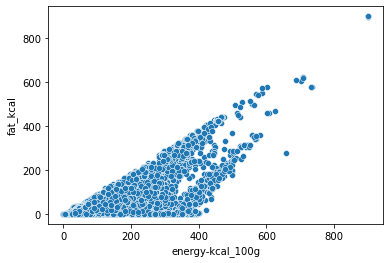

In [159]:
sns.scatterplot(x="energy-kcal_100g",
                y="fat_kcal",
                data=y
               )

<AxesSubplot:xlabel='carbohydrates_kcal', ylabel='proteins_kcal'>

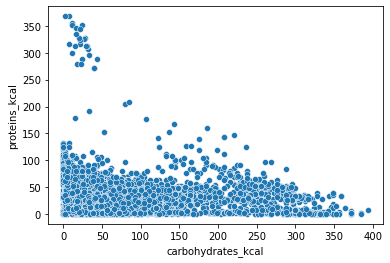

In [67]:
sns.scatterplot(x="carbohydrates_kcal",
                y="proteins_kcal",
                data=y
               )

Nous allons formuler l'hypothèse suivante: la répartition des macronutriments dépend significativement du groupe auquel appartient le produit.

On va étudier successivement la teneur en lipides, glucides et protéines dans les différents groupes de produits. La question est la suivante: la catégorie à laquelle appartient le produit détermine-t-elle et si oui à quel point la teneur en chaque macronutriment? On a l'intuition que cela va être le cas d'après les diagrammes en camembert présentés au début, nous allons vérifier cela de façon plus rigoureuse.

a:  0.4559291049178426
b:  0.5203090080159014
c:  0.5818047563544723
d:  0.7265133018294049
e:  0.6142466809059003
Comparaison des SSbetween:  23.243442000541904 23.24344200054182
Variances:  [13.097860561691732, 11.772656352367306, 10.701117095543736, 16.533118945211868, 20.347172992672654]
SSbetween, SSwithin:  23.243442000541904 72.4519259474873
MSBetween, MSwithin : 5.810860500135476 0.02903884807514521
F, p : 200.1064396596737 5.416963001310868e-149
eta squared:  0.2428899381333181


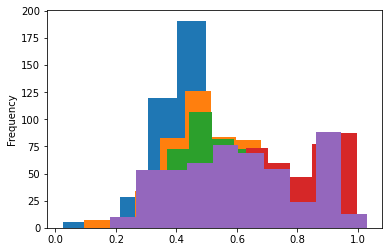

In [155]:
from scipy import stats

def anova_oneway(df, var_cat, measure, sample_size=500):
    global_data = df.copy()
    levels = global_data[var_cat].unique()
    
    # 1. Etude quantitative de la significativité du score moyen pour les groupes d'aliments
    data_samples = dict()
    length_samples = dict()
    
    # Constitution des échantillons associés à chacun de ces groupes
    for i,l in enumerate(sorted(levels)):
        dfi = df.groupby(var_cat).get_group(l)[measure].sample(sample_size)
        data_samples[i] = dfi
        length_samples[i] = dfi.shape[0]
        dfi.plot(kind="hist")
        try:
            print(l+": ", dfi.mean())
        except:
            print(str(l)+": ", dfi.mean())
    total = pd.concat([data_samples[i] for i in range(len(levels))])
    #global_data = y.sample(1000)["carbohydrates_ratio"]
    #odm = y.groupby("pnns_groups_2").get_group("One-dish meals")["fat_kcal"]
    #may = y.groupby("pnns_groups_2").get_group("Milk and yogurt")["fat_kcal"]
    #fru = y.groupby("pnns_groups_2").get_group("Fruits").sample(1000)["carbohydrates_ratio"]
    
    #N_odm = odm.shape[0]
    #N_may = may.shape[0]
    #N_fru = fru.shape[0]
    
    # nombre d'échantillons
    k = len(levels)
    
    # Nombre total d'individus
    N = total.shape[0]
    
    # Degrés de liberté "between", "within" et "total"
    DFbetween = k - 1
    DFwithin = N - k
    DFtotal = N - 1
    
    # SStotal
    SStotal = (total**2).sum() - (total.sum())**2/N
    #SStotal = (pd.concat([may, fru])**2).sum() - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)
    
    # SSwitihin
    ss_samples = dict()
    for i, l in enumerate(levels):
        ss_samples[i] = (data_samples[i]**2).sum() - (data_samples[i].sum())**2/length_samples[i]
    
    #ss_odm = (odm**2).sum() - (odm.sum())**2/N_odm
    #ss_may = (may**2).sum() - (may.sum())**2/N_may
    #ss_fru = (fru**2).sum() - (fru.sum())**2/N_fru
    
    SSwithin = sum([ss_samples[i] for i in range(len(levels))])
    #SSwithin = ss_odm + ss_may + ss_fru
    
    # SSbetween
    SSbetween = sum([(data_samples[i].sum())**2/length_samples[i] for i in range(len(levels))]) - ((total.sum())**2/N)
    #SSbetween1 = (odm.sum())**2/N_odm + (may.sum())**2/N_may + (fru.sum())**2/N_fru - (y["score"].sum())**2/N
    #SSbetween1 = (fru.sum())**2/N_fru + (may.sum())**2/N_may - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)
    
    SSbetween2 = SStotal - SSwithin
    print("Comparaison des SSbetween: ", SSbetween, SSbetween2)
    
    # MSbetween
    MSbetween = SSbetween/DFbetween
#    MSbetween = SSbetween1/DFbetween
    
    # MSwithin
    MSwithin = SSwithin/DFwithin
    #MSwithin = SSwithin/DFwithin
    
    #F
    F = MSbetween/MSwithin
    
    # p-valeur
    p = stats.f.sf(F, DFbetween, DFwithin)
    
    # eta squared
    eta_sq = SSbetween/SStotal
    
    # Verification de l'hypothèse de variance égale entre les groupes
    print("Variances: ", [ss_samples[i] for i in range(len(levels))])
    #print("Variances: ", ss_odm, ss_may, ss_fru)
    print("SSbetween, SSwithin: ", SSbetween, SSwithin)
    print("MSBetween, MSwithin :", MSbetween, MSwithin)
    print("F, p :", F, p)
    print("eta squared: ", eta_sq)

    
# Y a-t-il une association entre le score et le nutriscore_grade?
anova_oneway(y, "nutriscore_grade", "score")

"Faible effet, mais très significatif"

0:  0.41877919136678154
1:  0.6681669039187002
2:  0.7948075377137487
3:  0.4018706813599075
4:  0.6504098571367636
Comparaison des SSbetween:  58.181883758461026 58.18188375846093
Variances:  [3.226515705577839, 6.86881094885959, 11.260596202353554, 2.204450160612609, 4.413784740582798]
SSbetween, SSwithin:  58.181883758461026 27.97415775798639
MSBetween, MSwithin : 14.545470939615257 0.011212087277750056
F, p : 1297.302685868328 0.0
eta squared:  0.6753082283539457


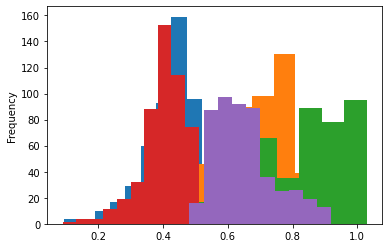

In [156]:
# Association entre le cluster et le score?
anova_oneway(z, "cluster", "score")

Hypothèse: les One-dish meals contiennent en général plus de protéines.

In [110]:
def anova_oneway(df, gp, var):
    global_data = df.copy()
    gr = global_data.groupby("pnns_groups_2").get_group(gp)[var].sample(1000)
    N_gr = gr.shape[0]

    ctrl = global_data[var].sample(N_gr)
    N_ctrl = ctrl.shape[0]

    total = pd.concat([ctrl, gr])
    N = total.shape[0]
        
    # nombre d'échantillons
    k = 2
    
    # Degrés de liberté "between", "within" et "total"
    DFbetween = k - 1
    DFwithin = N - k
    DFtotal = N - 1
    
    # SStotal
    SStotal = (total**2).sum() - (total.sum())**2/N
    
    # SSwitihin
    ss_ctrl = (ctrl**2).sum() - (ctrl.sum())**2/N_ctrl
    ss_gr = (gr**2).sum() - (gr.sum())**2/N_gr
    
    SSwithin = ss_ctrl + ss_gr
    
    # SSbetween
    SSbetween1 = (ctrl.sum())**2/N_ctrl + (gr.sum())**2/N_gr - (total.sum())**2/N
    #SSbetween1 = (fru.sum())**2/N_fru + (may.sum())**2/N_may - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)
    
    SSbetween2 = SStotal - SSwithin
    print("Comparaison des SSbetween: ", SSbetween1, SSbetween2)
    
    # MSbetween
    MSbetween = SSbetween1/DFbetween
    #    MSbetween = SSbetween1/DFbetween
    
    # MSwithin
    MSwithin = SSwithin/DFwithin
    #MSwithin = SSwithin/DFwithin
    
    #F
    F = MSbetween/MSwithin
    
    # p-valeur
    p = stats.f.sf(F, DFbetween, DFwithin)
    
    # eta squared
    eta_sq = SSbetween1/SStotal
    
    # Verification de l'hypothèse de variance égale entre les groupes
    #print("Variances: ", [ss_samples[i] for i in range(len(levels))])
    print("Variances: ", ss_ctrl, ss_gr)
    print("SSbetween, SSwithin: ", SSbetween1, SSwithin)
    print("MSBetween, MSwithin :", MSbetween, MSwithin)
    print("F, p :", F, p)
    print("eta squared: ", eta_sq)
    print("Q: ", (ctrl.mean()-gr.mean())/np.sqrt(MSwithin/N_gr))
    
anova_oneway(y, "One-dish meals", "proteins_kcal")

Comparaison des SSbetween:  32007.213214567397 32007.213214567397
Variances:  340057.05574366945 458081.0575387601
SSbetween, SSwithin:  32007.213214567397 798138.1132824295
MSBetween, MSwithin : 32007.213214567397 399.46852516638114
F, p : 80.12449341593607 7.839424763134906e-19
eta squared:  0.038556156606494106
Q:  -12.658948883373833


In [115]:
anova_oneway(y, "Fruits", "fiber_kcal")

Comparaison des SSbetween:  261.0386009554022 261.0386009554022
Variances:  6959.32733021759 14924.891510976006
SSbetween, SSwithin:  261.0386009554022 21884.218841193597
MSBetween, MSwithin : 261.0386009554022 10.953062483079878
F, p : 23.832476200939293 1.134318922839132e-06
eta squared:  0.011787562264169856
Q:  -6.903980909727262


<AxesSubplot:xlabel='proteins_kcal', ylabel='Count'>

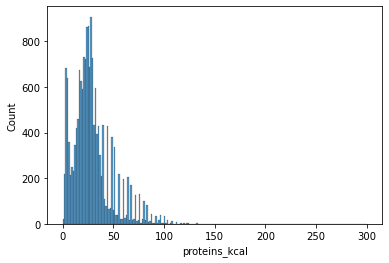

In [96]:
sns.histplot(odm)

(-15.0, 300.0)

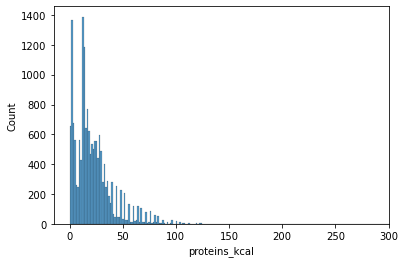

In [97]:
sns.histplot(ctrl)
plt.xlim([-15, 300])

(-15.0, 300.0)

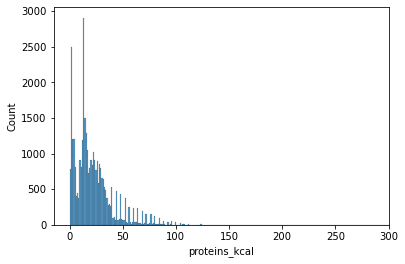

In [98]:
sns.histplot(total)
plt.xlim([-15, 300])

In [102]:
# nombre d'échantillons
k = 2

# Degrés de liberté "between", "within" et "total"
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

# SStotal
SStotal = (total**2).sum() - (total.sum())**2/N

# SSwitihin
ss_ctrl = (ctrl**2).sum() - (ctrl.sum())**2/N_ctrl
ss_odm = (odm**2).sum() - (odm.sum())**2/N_odm

SSwithin = ss_ctrl + ss_odm

# SSbetween
SSbetween1 = (ctrl.sum())**2/N_ctrl + (odm.sum())**2/N_odm - (total.sum())**2/N
#SSbetween1 = (fru.sum())**2/N_fru + (may.sum())**2/N_may - (pd.concat([may, fru]).sum())**2/(N_fru+N_may)

SSbetween2 = SStotal - SSwithin
print("Comparaison des SSbetween: ", SSbetween1, SSbetween2)

# MSbetween
MSbetween = SSbetween1/DFbetween
#    MSbetween = SSbetween1/DFbetween

# MSwithin
MSwithin = SSwithin/DFwithin
#MSwithin = SSwithin/DFwithin

#F
F = MSbetween/MSwithin

# p-valeur
p = stats.f.sf(F, DFbetween, DFwithin)

# eta squared
eta_sq = SSbetween1/SStotal

# Verification de l'hypothèse de variance égale entre les groupes
#print("Variances: ", [ss_samples[i] for i in range(len(levels))])
print("Variances: ", ss_ctrl, ss_odm)
print("SSbetween, SSwithin: ", SSbetween1, SSwithin)
print("MSBetween, MSwithin :", MSbetween, MSwithin)
print("F, p :", F, p)
print("eta squared: ", eta_sq)
print("Q: ", (ctrl.mean()-fr.mean())/np.sqrt(MSwithin/N_odm))

Comparaison des SSbetween:  6165553.138429046 519110.1189995315
Variances:  7523511.672807826 6694138.979657266
SSbetween, SSwithin:  6165553.138429046 14217650.652465092
MSBetween, MSwithin : 6165553.138429046 408.5766610858409
F, p : 15090.321414941709 0.0
eta squared:  0.418379129175229
Q:  -1.3691689592556244


# VI Réduction dimensionnelle: KNN

Peut-on regrouper nos produits en clusters? plotter par exemple score vs macronutriment, avec hue="cluster"

In [143]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 5



# préparation des données pour le clustering
#data = X.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
#X_scaled = preprocessing.StandardScaler().fit_transform(df_acp)

# Clustering par K-means
km = KMeans(n_clusters=n_clust, n_init=100)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

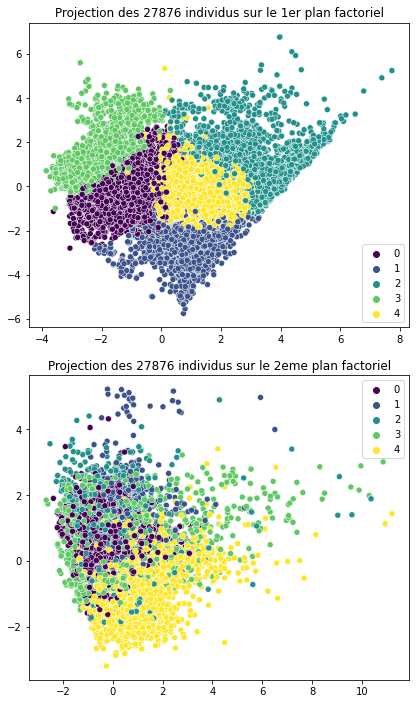

In [152]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 10))
# Affichage du clustering par projection des individus sur le premier plan factoriel
#pca = decomposition.PCA(n_components=4).fit(df_acp)
#X_projected = pca.transform(df_acp)
sns.scatterplot(x=X_projected[:, 0], 
                y=X_projected[:, 1], 
                data=X_projected, 
                hue=clusters, 
                palette="viridis",
                ax=ax1)
ax1.set_title("Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

sns.scatterplot(x=X_projected[:, 2], 
                y=X_projected[:, 3], 
                data=X_projected,
                hue=clusters, 
                palette="viridis", 
                ax=ax2)
ax2.set_title("Projection des {} individus sur le 2eme plan factoriel".format(X_projected.shape[0]))

plt.tight_layout(pad=1.5)
plt.show()

In [153]:
z = y.dropna(subset=["score"]).copy()
z.loc[:, "cluster"] = clusters
z.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,fat_ratio,carbohydrates_ratio,proteins_ratio,score,cluster
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,1.0,2.7,21.2,3.6,4.50,27.50,0.084375,0.662500,0.112500,0.179409,3
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,-2.0,0.0,144.0,2.4,6.84,153.24,0.000000,0.939702,0.015662,0.432233,3
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,1.0,114.3,15.6,7.6,5.50,137.50,0.799301,0.109091,0.053147,0.877957,4
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,17.0,135.0,4.0,96.0,0.00,235.00,0.574468,0.017021,0.408511,0.815763,2
4,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",b,One-dish meals,53.0,c,109.2,0.0,19.8,61.2,27.2,0.95,109.15,0.181402,0.560696,0.249198,0.307515,0


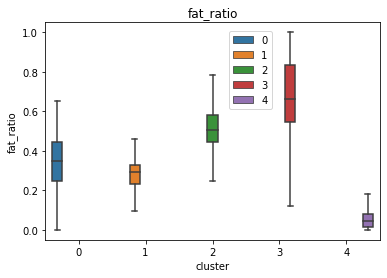

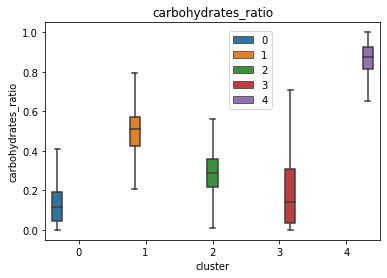

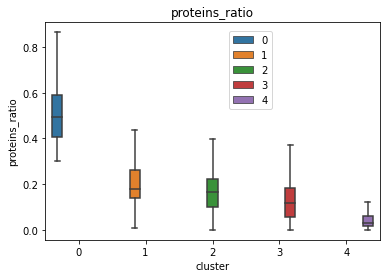

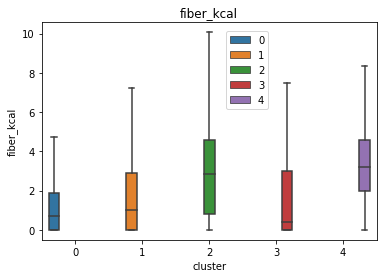

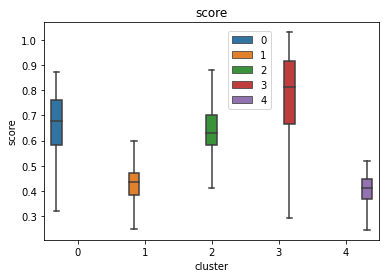

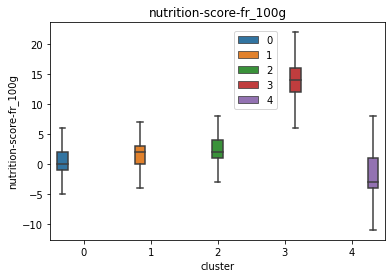

In [422]:
for c in ["fat_ratio", "carbohydrates_ratio", "proteins_ratio", "fiber_kcal", "score", "nutrition-score-fr_100g"]:
    fig, ax = plt.subplots()
    sns.boxplot(x="cluster",
            y=c,
            data=z.sort_values(by=c),
            hue="cluster",
            showfliers=False
         )
    ax.legend(loc=(0.55, 0.6))
    plt.title(c)
    plt.show()

Comment peut-on caractériser chaque cluster plus précisément? 

In [345]:
# Regroupement par cluster et calcul des moyennes des valeurs nutritionnelles
z_clusters = z.groupby("cluster")

In [409]:
z_clusters[["fat_ratio", "score", "fiber_kcal", "carbohydrates_ratio", "nutrition-score-fr_100g"]].mean().sort_values(by=["score", "fiber_kcal"])

,fat_ratio,score,fiber_kcal,carbohydrates_ratio,nutrition-score-fr_100g
cluster,,,,,
4,0.059975,0.400246,3.693606,0.849939,-0.732085
1,0.277107,0.419460,1.683374,0.505244,1.848221
2,0.524467,0.651113,3.072011,0.284149,2.543215
0,0.339233,0.663034,1.230419,0.127496,0.560434
3,0.677482,0.783542,1.714042,0.185271,14.184434


hypothèse: chaque cluster est associé significativement avec le score.

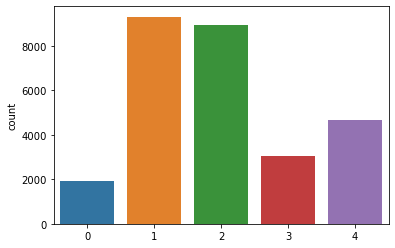

In [351]:
sns.countplot(x=clusters)
plt.show()

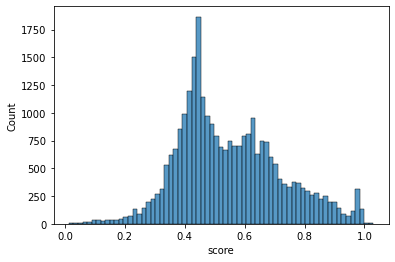

In [352]:
sns.histplot(x="score",
             data=z
            )
plt.show()

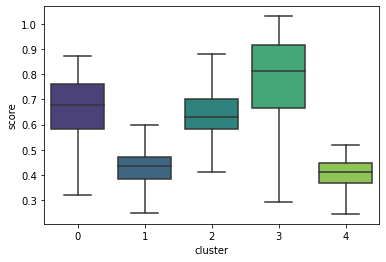

In [363]:
sns.boxplot(x="cluster",
            y="score",
            data=z.sort_values(by="cluster"),
            showfliers=False,
            palette="viridis"
           )

plt.show()

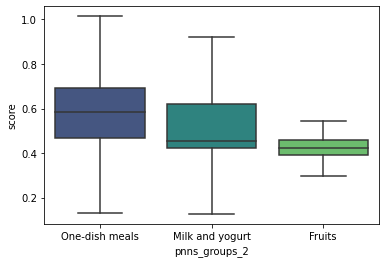

In [366]:
sns.boxplot(x="pnns_groups_2",
            y="score",
            data=z.sort_values(by="cluster"),
            showfliers=False,
            palette="viridis"
           )
plt.show()

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('fat_ratio ~ pnns_groups_2',
                data=y).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq       df            F  PR(>F)
pnns_groups_2  432.739618      2.0  6286.187368     0.0
Residual       975.011914  28327.0          NaN     NaN


## II.3 Résumés

### II.3.1 Distribution des macronutriments selon les groupes d'aliment et nutriscore

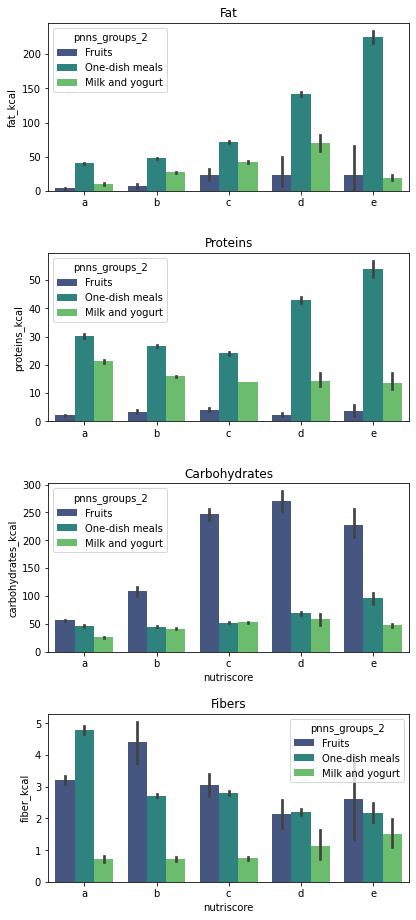

In [238]:
fig, ((ax1, ax2 ,ax3, ax4)) = plt.subplots(nrows=4, figsize=(6, 13))

sns.barplot(x="nutriscore_grade",
            y='fat_kcal',
            data=X.sort_values(by="nutriscore_grade"),
            palette="viridis",
            hue="pnns_groups_2",
            ax=ax1
           )
ax1.set_title("Fat")
ax1.set_xlabel("")

sns.barplot(x="nutriscore_grade",
              y="proteins_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax2
           )
ax2.set_title("Proteins")
ax2.set_xlabel("")

sns.barplot(x="nutriscore_grade",
              y="carbohydrates_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax3
           )
ax3.set_title("Carbohydrates")
ax3.set_xlabel("nutriscore")

sns.barplot(x="nutriscore_grade",
              y="fiber_kcal",
              data=X.sort_values(by="nutriscore_grade"),
              palette="viridis",
            hue="pnns_groups_2",
              ax=ax4
           )
ax4.set_title("Fibers")
ax4.set_xlabel("nutriscore")


plt.tight_layout(pad=1.5)
plt.show()

### II.3.2 Distribution des groupes d'aliment par macronutriment et nutriscore

In [232]:
# On commence par regrouper les données par catégorie d'aliment
cat_nutri = X.groupby(["pnns_groups_2"])[["nutriscore_grade","fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]]

## On va transformer le dataset de manière à pouvoir traiter les données comme s'il s'agissait
## de trois variables différentes: nutriscore, type de nutriment, et energie associée à chaque nutriment, au lieu
## des 5 variables: nutriscore_grade, fat_kcal, carbohydrates_kcal etc. 

## Exemple pour la catégorie "One-dish meals"
# Récupération des données associées au groupe
y = cat_nutri.get_group(("One-dish meals")).dropna(subset=["nutriscore_grade"])

# transformation du dataframe au format "long", c'est-à-dire une variable/colonne
y_long = y.melt(id_vars=["nutriscore_grade"], var_name="nutrient_type", value_name="nutrient_energy")
y_long.head()

,nutriscore_grade,nutrient_type,nutrient_energy
0,b,fat_kcal,2.7
1,b,fat_kcal,114.3
2,d,fat_kcal,135.0
3,b,fat_kcal,19.8
4,b,fat_kcal,37.8


Cela correspond au format souhaité. On va automatiser ce traitement pour effectuer la visualisation.

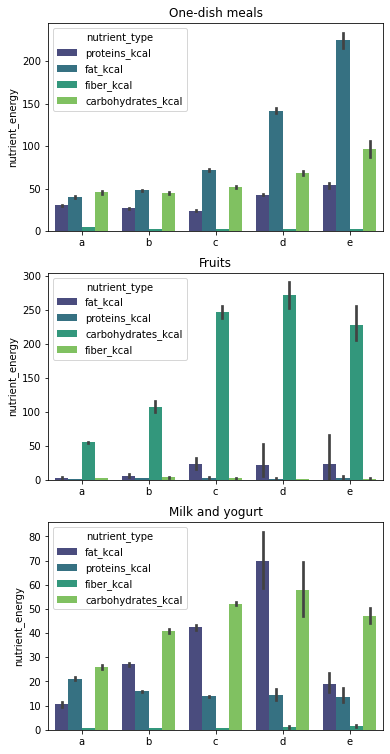

In [233]:
## Affichage des données sous forme de barplot pour chaque catégorie et chaque nutriscore

fig, axs = plt.subplots(nrows=3, figsize=(6, 13))

for i, pg in enumerate(X.pnns_groups_2.unique()):
    y = cat_nutri.get_group(pg).dropna(subset=["nutriscore_grade"])
    y_long = y.melt(id_vars=["nutriscore_grade"], var_name="nutrient_type", value_name="nutrient_energy")
    sns.barplot(x="nutriscore_grade",
                y='nutrient_energy',
                data=y_long.sort_values(by="nutriscore_grade"),
                palette="viridis",
                hue="nutrient_type",
                ax=axs[i]
               )
    axs[i].set_title(pg)
    axs[i].set_xlabel("")
    plt.tight_layout

plt.show()

### II.3.3 Distribution des nutriscores par groupe d'aliment et macronutriments

In [70]:
X.groupby(["pnns_groups_2", "nutriscore_grade", "categories_tags"]).get_group(("Milk and yogurt", "d", ""))

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
90,West country luxury yogurt lemon and lemon curd,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,54.0,c,169.0,11.0,72.900000,81.6,13.2,1.300,167.700000
247,Greek yogurt plain,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,NaN,NaN,80.0,11.0,0.000000,24.0,60.0,0.000,84.000000
280,West Country Luxury Yogurt - Lemon & Lime curd,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,54.0,c,169.0,11.0,72.900000,81.6,13.2,1.520,169.220000
307,Lemon fruit fool,"en:dairies,en:fermented-foods,en:fermented-mil...",d,Milk and yogurt,NaN,NaN,209.0,15.0,105.300000,94.0,10.0,0.931,210.231000
339,British double cream,"en:dairies,en:creams",d,Milk and yogurt,57.0,c,445.0,15.0,427.500000,10.4,6.8,0.000,444.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36303,Tatua Dairy Whip Cream Whipped Gluten free,"en:dairies,en:creams,en:whipped-creams,fr:crem...",d,Milk and yogurt,55.0,c,293.0,16.0,243.000000,34.8,13.6,1.600,291.400000
36304,Chocolat mousse,"en:dairies,en:desserts,en:creams,en:chocolate-...",d,Milk and yogurt,20.0,d,282.3,16.0,207.900000,65.2,9.2,0.000,282.300000
36313,Crème fouettée,"en:dairies,en:creams,en:whipped-creams",d,Milk and yogurt,55.0,c,342.0,14.0,324.899986,12.4,9.6,0.000,346.899986
36315,Meadow Fresh Whipping Cream 1L,"en:dairies,en:creams,en:whipped-creams",d,Milk and yogurt,55.0,c,340.0,14.0,324.000000,12.4,8.8,0.000,345.200000


Il va falloir affiner les sélections ici... Ne pas garder tout ce qui est "crème fouettée" par exemple. Surement crème fraîche aussi.

In [436]:
X.loc[X.product_name=="Greek yogurt plain", "categories_tags"].to_numpy()

array(['en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts,en:greek-style-yogurts',
       'en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts,en:plain-yogurts,en:cow-milk-yogurts,en:greek-style-yogurts,en:plain-greek-style-yogurts'],
      dtype=object)

In [314]:
may = X.groupby(["pnns_groups_2"]).get_group(("Milk and yogurt"))

In [315]:
may.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,fat_ratio,carbohydrates_ratio,proteins_ratio,score,score_group
6,Yaourt fermier Pur chèvre,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,NaN,NaN,99.9,NaN,34.5,49.9,14.8,0.7,99.9,0.345345,0.499499,0.148148,0.106006,1
17,Yaourt brasse aux fruits,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,NaN,NaN,96.0,NaN,27.3,54.5,13.7,0.5,96.0,0.284375,0.567708,0.142708,0.240625,1
37,Yaourt nature brebis,"en:dairies,en:fermented-foods,en:fermented-mil...",a,Milk and yogurt,NaN,NaN,44.0,-3.0,0.9,17.2,25.2,0.7,43.3,0.020455,0.390909,0.572727,0.761364,2
38,Yaourt au lait de brebis bio Nature,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,NaN,NaN,106.2,NaN,50.7,35.2,19.6,0.7,106.2,0.477401,0.331450,0.184557,0.230508,1
39,Yaourt de brebis vanille,"en:dairies,en:fermented-foods,en:fermented-mil...",b,Milk and yogurt,NaN,NaN,85.0,1.0,25.2,40.0,20.0,0.7,85.2,0.293364,0.465658,0.232829,0.205122,1


In [316]:
may.categories_tags.value_counts().sort_values(ascending=False)

en:dairies,en:milks                                                                                                                                                               467
en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts                                                                                                               467
en:dairies,en:milks,en:homogenized-milks,en:semi-skimmed-milks,en:uht-milks                                                                                                       360
en:dairies,en:fermented-foods,en:fermented-milk-products,en:yogurts,en:plain-yogurts                                                                                              257
en:dairies,en:milks,en:semi-skimmed-milks                                                                                                                                         241
                                                                                          

tags les plus représentées?

Ne récupérons que les produits inclus dans la catégorie "en:yogurts"

In [317]:
yogurts = may.loc[may.apply(lambda x: x["categories_tags"].count("en:yogurts")!=0, axis=1)]

In [318]:
yogurts.shape

(4780, 18)

In [319]:
yogurts.dropna(subset=["nutriscore_grade"]).shape

(4386, 18)

In [320]:
yogurts.nutriscore_grade.value_counts()

c    2106
b    1517
a     610
e     100
d      53
Name: nutriscore_grade, dtype: int64

In [321]:
nutri_yogurts = yogurts[["nutriscore_grade","fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]]
nutri_yogurts_long = nutri_yogurts.melt(id_vars="nutriscore_grade", var_name="nutrient_type", value_name="nutrient_energy")

<AxesSubplot:xlabel='nutriscore_grade', ylabel='nutrient_energy'>

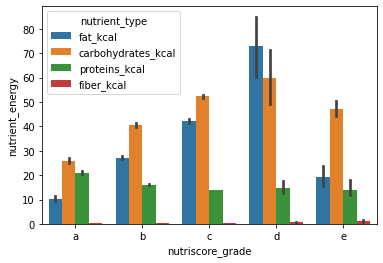

In [322]:
sns.barplot(x="nutriscore_grade",
            y="nutrient_energy",
            data=nutri_yogurts_long,
            hue="nutrient_type"
           )

Beaucoup mieux!

Il va falloir faire ce traitement dans la partie nettoyage.

On retire lignes pour lesquelles toutes les valeurs sont nulles